<a href="https://www.kaggle.com/code/sanskarbhushankar/dynamic-pricing-sanskar?scriptVersionId=201343470" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Insights and Analysis Based on the Dataset

**1. Customer Loyalty Analysis**
- Analyze how the average ratings and historical costs differ between loyal (Silver) and regular customers.
- Visualize the number of past rides per customer loyalty status using bar charts.

**2. Location-Based Demand Analysis**
- Compare the number of riders and drivers in urban, suburban, and rural areas.
- Create a stacked bar chart to show the proportion of rides and drivers by location category.

**3. Time of Booking Analysis**
- Analyze which times of day have the highest ride demand and how that correlates with customer loyalty status.
- Use a heatmap to visualize ride bookings by time and location category.

**4. Average Rating Analysis**
- Investigate the relationship between average ratings and historical costs of rides.
- Create scatter plots to visualize correlations, such as the effect of vehicle type on ratings or costs.

**5. Expected Ride Duration vs. Historical Cost**
- Analyze the expected ride duration against the historical cost of rides to identify any patterns or discrepancies.
- Use a line graph to show trends or average costs by expected duration.

**6. Driver Utilization Rates**
- Calculate the ratio of riders to drivers in each location category to understand supply and demand.
- Visualize these ratios using pie charts to show the distribution of driver utilization rates across different areas.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns


/kaggle/input/dynamic-pricing-dataset/dynamic_pricing.csv


In [2]:
data = pd.read_csv("/kaggle/input/dynamic-pricing-dataset/dynamic_pricing.csv")
#print(data.head())

In [3]:
data.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [4]:
def analyze_dataset(file_path):
    # Load the dataset based on file type
    if isinstance(file_path, pd.DataFrame):
        df = file_path
    elif file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    else:
        raise ValueError("Unsupported file format. Please use CSV or Excel files.")
    
    # Initialize an empty list to hold the summary data
    summary = []

    for col in df.columns:
        col_data = df[col]
        
        if pd.api.types.is_numeric_dtype(col_data):
            col_type = 'Numeric'
        elif pd.api.types.is_datetime64_any_dtype(col_data):
            col_type = 'Datetime'
        elif pd.api.types.is_bool_dtype(col_data):
            col_type = 'Boolean'
        elif pd.api.types.is_object_dtype(col_data):
            # Check if column contains mixed data types
            unique_types = set(col_data.apply(lambda x: type(x)).unique())
            if len(unique_types) > 1:
                # Fixing the issue with backslash in f-string
                col_type = f'Mixed: {", ".join([str(t).split(".")[1] for t in unique_types])}'
            else:
                col_type = 'String'
        else:
            col_type = 'Other'

        # Get the number of unique values, missing values, and total values
        unique_values = col_data.nunique()
        missing_values = col_data.isnull().sum()
        total_values = len(col_data)

        # Append the column summary to the list
        summary.append({
            'Column Name': col,
            'Data Type': col_type,
            'Unique Values': unique_values,
            'Missing Values': missing_values,
            'Total Values': total_values,
            'Percentage Missing': (missing_values / total_values) * 100
        })

    # Return the summary as a DataFrame
    return pd.DataFrame(summary)

summary_output = analyze_dataset(data)
print(summary_output)


               Column Name Data Type  Unique Values  Missing Values  \
0         Number_of_Riders   Numeric             81               0   
1        Number_of_Drivers   Numeric             79               0   
2        Location_Category    String              3               0   
3  Customer_Loyalty_Status    String              3               0   
4     Number_of_Past_Rides   Numeric            101               0   
5          Average_Ratings   Numeric            151               0   
6          Time_of_Booking    String              4               0   
7             Vehicle_Type    String              2               0   
8   Expected_Ride_Duration   Numeric            171               0   
9  Historical_Cost_of_Ride   Numeric           1000               0   

   Total Values  Percentage Missing  
0          1000                 0.0  
1          1000                 0.0  
2          1000                 0.0  
3          1000                 0.0  
4          1000             

In [5]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB
None


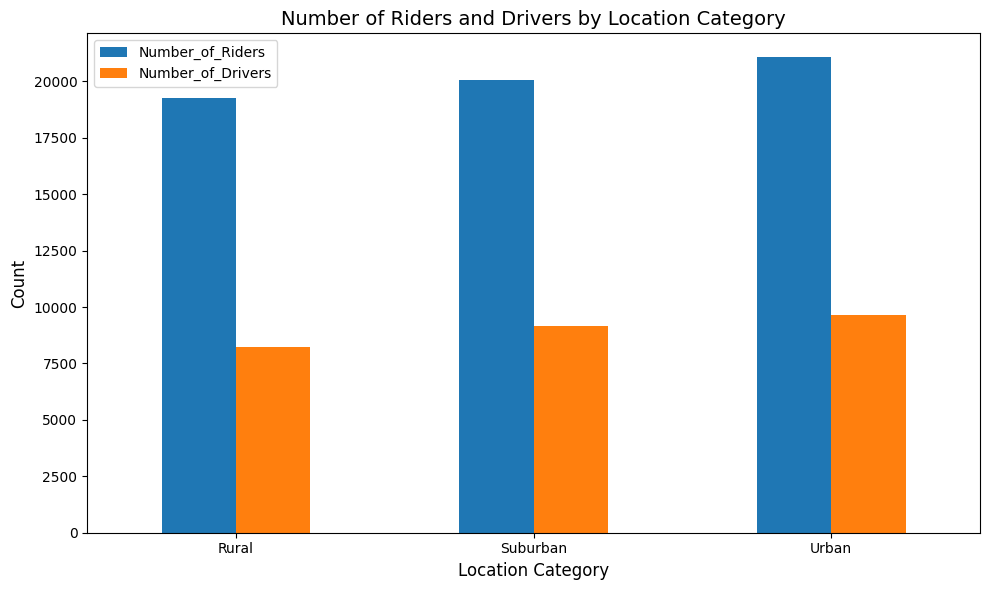

In [6]:
# Grouping the data by Location_Category and summing the number of riders and drivers
location_demand = data.groupby('Location_Category').agg({
    'Number_of_Riders': 'sum',
    'Number_of_Drivers': 'sum'
}).reset_index()

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Creating the bar plot
location_demand.plot(kind='bar', x='Location_Category', y=['Number_of_Riders', 'Number_of_Drivers'], ax=ax)

# Setting the title and labels
ax.set_title('Number of Riders and Drivers by Location Category', fontsize=14)
ax.set_xlabel('Location Category', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Display the plot
plt.xticks(rotation=0)  # Set x-axis labels to horizontal
plt.tight_layout()
plt.show()

In [7]:
print(data.columns)

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')


In [8]:
# Step 1: Filter the data for Urban areas
urban_data = data[data['Location_Category'] == 'Urban']
suburban_data = data[data['Location_Category'] == 'subUrban']
# Step 2: Calculate the total number of riders and drivers in the Urban area
total_riders_urban = urban_data['Number_of_Riders'].sum()
total_drivers_urban = urban_data['Number_of_Drivers'].sum()

# Step 3: Calculate the drivers per rider ratio
drivers_per_rider = total_drivers_urban / total_riders_urban

# Print the drivers per rider ratio
print(f"Total Riders in Urban Area: {total_riders_urban}")
print(f"Total Drivers in Urban Area: {total_drivers_urban}")
print(f"Drivers Per Rider in Urban Area: {drivers_per_rider:.2f}")

Total Riders in Urban Area: 21074
Total Drivers in Urban Area: 9647
Drivers Per Rider in Urban Area: 0.46


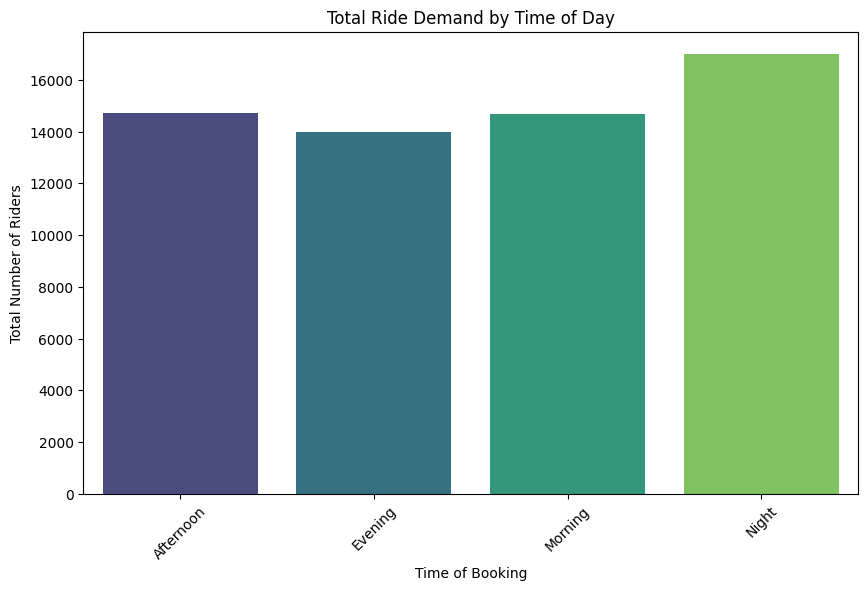

<Figure size 1200x800 with 0 Axes>

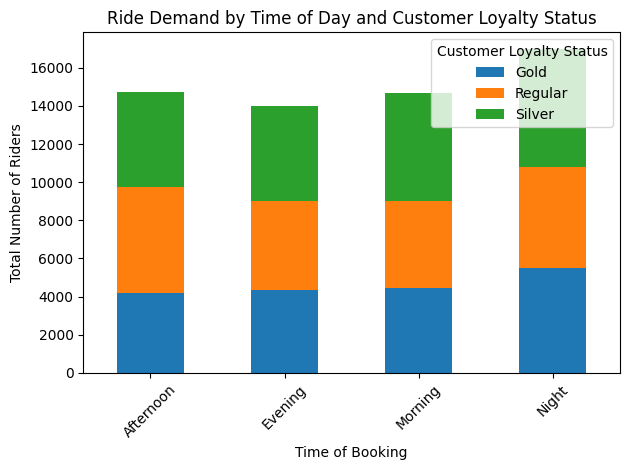

In [9]:
# Step 2: Analyze total ride demand by Time of Booking
ride_demand_by_time = data.groupby('Time_of_Booking')['Number_of_Riders'].sum().reset_index()

# Step 3: Visualize the total ride demand by time of day
plt.figure(figsize=(10, 6))
sns.barplot(x='Time_of_Booking', y='Number_of_Riders', data=ride_demand_by_time, palette='viridis')
plt.title('Total Ride Demand by Time of Day')
plt.xlabel('Time of Booking')
plt.ylabel('Total Number of Riders')
plt.xticks(rotation=45)
plt.show()

# Step 4: Analyze ride demand by Time of Booking and Customer Loyalty Status
loyalty_time_demand = data.groupby(['Time_of_Booking', 'Customer_Loyalty_Status'])['Number_of_Riders'].sum().unstack()

# Step 5: Visualize the demand by Time of Booking and Customer Loyalty Status
plt.figure(figsize=(12, 8))
loyalty_time_demand.plot(kind='bar', stacked=True)
plt.title('Ride Demand by Time of Day and Customer Loyalty Status')
plt.xlabel('Time of Booking')
plt.ylabel('Total Number of Riders')
plt.xticks(rotation=45)
plt.legend(title='Customer Loyalty Status')
plt.tight_layout()
plt.show()